In [ ]:
# system libraries
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# visualisation libraries
import matplotlib.pyplot as plt

# wordcloud libraries
from PIL import Image
from wordcloud import WordCloud

# data cleaning functions
from collections import Counter
from data_processing import load_and_clean_survey_data

df = load_and_clean_survey_data('../data/raw/GiG2025_clean.csv')

In [2]:
df.head()

,first_name,last_name,email_id,academic_position,faculty,department,discipline,health_research_keywords,research_methods,research_methods_other,...,health_third_mission,participate_in_kinderuni,participate_in_lndf,outreach_other,collab_fac1,collab_fac2,collab_uni1,collab_uni2,collab_uni3,collab_uni4
0,Giorgia,Silani,giorgia.silani@univie.ac.at,Associate Professor/Ao. Professor,Faculty of Psychology,Department of Clinical and Health Psychology,social neuroscience,"[mental health literacy, emotions, empathy, ne...",mainly quantitative,-99,...,-99,"Yes, please contact me about it","Yes, please contact me about it",-99,Faculty of Computer science,Centre for Sport Science and University Sports,Graz Medical University,University of Salzburg,None,None
1,Laura,König,laura.koenig@univie.ac.at,Full Professor,Faculty of Psychology,Department of Clinical and Health Psychology,Health psychology,"[health promotion, diet, physical activity, se...",mainly quantitative,-99,...,"lay audiences/ general public, e.g. via podcas...",No,"Yes, please contact me about it",-99,Faculty of Social sciences,None,Vienna Medical University,University of Music and Performing Arts in Vienna,None,None
2,Julia,Holzer,julia.holzer@univie.ac.at,Scientific Staff,Faculty of Psychology,Department of Developmental and Educational Ps...,Psychology,"[well-being, motivation, basic psychological n...",both quantitative and qualitative,-99,...,I regularly give talks and workshops for vario...,"Yes, please contact me about it","Yes, please contact me about it",-99,Faculty of Life sciences,None,None,None,None,None
3,Martina,Zemp,martina.zemp@univie.ac.at,Full Professor,Faculty of Psychology,Department of Clinical and Health Psychology,Clinical Child and Adolescent Psychology,"[children, adolescents, families, couples, rel...",mainly quantitative,-99,...,-99,No,No,-99,Centre for Teacher Education,None,Vienna Medical University,None,None,None
4,Valeria,Bordone,valeria.bordone@univie.ac.at,Associate Professor/Ao. Professor,Faculty of Social sciences,Department of Sociology,Sociology,"[Cognition, wellbeing, intergenerational relat...",mainly quantitative,-99,...,-99,"Yes, please contact me about it",No,-99,None,None,None,None,None,None


In [3]:
df['health_research_keywords'] = df['health_research_keywords'].apply(lambda x: [keyword.lower() for keyword in x])

In [4]:
def clean_keyword(keyword):
    if keyword.startswith('and '):
        keyword = keyword[4:]
    if keyword.startswith('healthy '):
        keyword = keyword[7:]
    return keyword

df['health_research_keywords'] = df['health_research_keywords'].apply(lambda x: [clean_keyword(keyword) for keyword in x])

In [ ]:
health_keyword_replacements = {
    'aging': 'ageing',
    'AI and health': 'AI',
    'cultural': 'culture',
    'culture notions': 'culture',
    'digital health divide': 'digital health',
    'families': 'family',
    'family formation processes': 'family',
    'global health politics & governance': 'global health',
    'global health security': 'global health',
    'health behaviour': 'health behaviour change',
    'health behaviours': 'health behaviour change',
    'health benefits of sport and exercise': 'sport science',
    'mental health literacy': 'mental health',
    'mental wellbeing': 'mental health',
    'motivation to exercise behavior': 'motivation',
    'music intervention': 'music & health',
    'omics': 'multi-omics',
    'parental leave': 'parenting',
    'psychological determinants': 'psychological',
    'psychological/ psychotherapeutic interventions': 'psychological',
    'psychosocial interventions': 'psychosocial',
    'reproductive health': 'reproductive decisions',
    'school well-being': 'wellbeing',
    'smartphone use': 'social media',
    'social media use': 'social policy',
    'social relationships': 'social policy',
    'social participation': 'social policy',
    'sports injury': 'sport science',
    'teacher well-being': 'wellbeing',
    'well-being': 'wellbeing'
}

df['health_research_keywords'] = df['health_research_keywords'].apply(
    lambda x: [health_keyword_replacements.get(keyword, keyword) for keyword in x]
)

In [6]:
health_keywords_text = ''
for keyword_list in df['health_research_keywords']:
    for keyword in keyword_list:
        health_keywords_text += keyword + ', '
    
print(health_keywords_text)

mental health, emotions, empathy, neurodiversity, schools, autism, health promotion, diet, physical activity, sedentary behaviour, health communication, science communication, psychological, physical environment, research participation effects, digital health, wellbeing, motivation, basic psychological needs, socio-economic disadvantage, science education, science literacy, science outreach, implementation research, programme evaluation, children, adolescents, family, couples, relationships, parenting, adhd, minority stress, resilience, social anxiety, cognition, wellbeing, intergenerational relationships, grandparenthood, family, ageing, working status, environmental attitutes, skeletal muscle, tendon, ageing, strength, fitness, resistance training, sarcopenia, obesity, sport science, overuse syndromes, health governance, vaccination policy, vaccine hesitancy, data governance & politics, evidence & policy, health behaviour change, physical activity,  eating, menstrual health, sleep, o

In [ ]:
# Flatten the list of lists and get unique items
unique_health_keywords = set([keyword for sublist in df['health_research_keywords'] for keyword in sublist])

unique_health_keywords_sorted = sorted(unique_health_keywords, key=lambda x: x.lower())
unique_health_keywords_sorted

[' ageing',
 ' eating',
 '(health) data reliability',
 'adhd',
 'adolescents',
 'advertising',
 'africa',
 'ageing',
 'ai and health',
 'ai companions',
 'alcohol',
 "alzheimer's disease",
 'antibiotic resistance',
 'attention',
 'autism',
 'bacterial toxins',
 'basic psychological needs',
 'behavior change programs',
 'bioactive natural products',
 'bioanalysis',
 'biodiversity',
 'bioenergetics',
 'biological risks',
 'biological weapons',
 'biosynthetic pathways',
 'biotechnology law',
 'blood',
 'causal inference in demography',
 'cell biology',
 'cellular stress resistance',
 'chemistry of microbial interactions',
 'chemoproteomics',
 'children',
 'cities',
 'cognition',
 'cognitive biases',
 'cognitive functioning',
 'complex systems',
 'couples',
 'creative',
 'culture',
 'data analysis',
 'data governance & politics',
 'data visualization',
 'dementia',
 'diet',
 'dietary pattern',
 'digital health',
 'disconnection',
 'drug discovery',
 'dual-use research',
 'eating behaviour'

In [ ]:
# Flatten the list of lists and count the occurrences of each keyword
health_keywords_flat = [keyword for sublist in df['health_research_keywords'] for keyword in sublist]
health_keywords_counter = Counter(health_keywords_flat)

# Display the counter in descending order
health_keywords_counter.most_common()

[('wellbeing', 8),
 ('mental health', 7),
 ('ageing', 6),
 ('stress', 5),
 ('physical activity', 4),
 ('family', 4),
 ('health behaviour change', 4),
 ('social policy', 4),
 ('psychological', 3),
 ('sport science', 3),
 ('global health', 3),
 ('health communication', 2),
 ('digital health', 2),
 ('motivation', 2),
 ('parenting', 2),
 ('resilience', 2),
 ('cognition', 2),
 ('intergenerational relationships', 2),
 ('grandparenthood', 2),
 ('skeletal muscle', 2),
 ('fitness', 2),
 ('sarcopenia', 2),
 ('mindfulness', 2),
 ('fatigue', 2),
 ('music & health', 2),
 ('reproductive decisions', 2),
 ('multi-omics', 2),
 ('culture', 2),
 ('immune cells', 2),
 ('emotions', 1),
 ('empathy', 1),
 ('neurodiversity', 1),
 ('schools', 1),
 ('autism', 1),
 ('health promotion', 1),
 ('diet', 1),
 ('sedentary behaviour', 1),
 ('science communication', 1),
 ('physical environment', 1),
 ('research participation effects', 1),
 ('basic psychological needs', 1),
 ('socio-economic disadvantage', 1),
 ('science

removed 'and ' if at the start
removed 'health ' if at the start

aging -> ageing
AI and health -> AI
cultural -> culture
culture notions -> culture
digital health divide -> digital health
families -> family
family formation processes -> family
families -> family
global health politics & governance -> global health
global health security -> global health
health behaviour -> health behaviour change
health behaviours -> health behaviour change
health benefits of sport and exercise -> sport science
mental health literacy -> mental health
mental wellbeing -> mental health
motivation to exercise behavior -> motivation
music intervention -> music & health
omics -> multi-omics
parental leave -> parenting
psychological determinants -> psychological
psychological/ psychotherapeutic interventions -> psychological
psychosocial interventions -> psychosocial
reproductive health -> reproductive decisions
school well-being -> well-being
smartphone use -> social media
social media use -> social policy
social relationships -> social policy
social participation -> social policy
sports injury -> sport science
teacher well-being -> well-being
wellbeing -> well-being

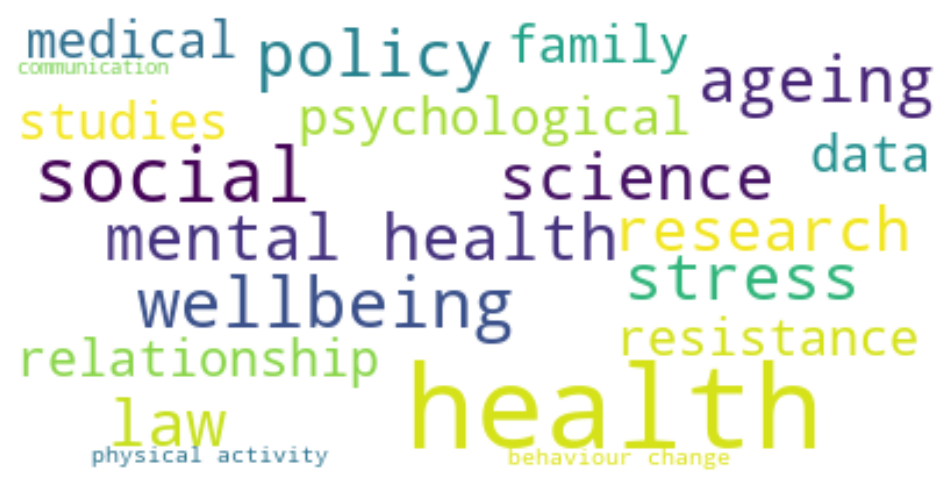

In [23]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(health_keywords_text)
plt.figure()

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.gcf().set_size_inches(12, 10)
plt.axis("off")
plt.show()

In [12]:
df['research_methods_keywords'] = df['research_methods_keywords'].apply(lambda x: [keyword.lower() for keyword in x])

In [19]:
rm_replacements = {
    'chip': 'co-ip',
    'behavioural experiments': 'behavioural experiments',
    'behavioural': 'behavioural experiments',
    'behavioural assessments': 'behavioural experiments',
    'ecological momentary assessment (ema)': 'ecological momentary assessment',
    'ecological momentary interventions': 'ecological momentary assessment',
    'ema': 'ecological momentary assessment',
    'emi': 'ecological momentary assessment',
    'experimental': 'experimental studies',
    'experimental designs': 'experimental studies',
    'experimental research': 'experimental studies',
    'experiment': 'experimental studies',
    'eye-tracking...': 'eye-tracking',
    'eye tracking': 'eye-tracking',
    'field research (partnering with sport clubs/federations)': 'fieldwork',
    'fixed effects models': 'fixed-effects',
    'gene expression (immune and muscle cells)': 'genotyping',
    'group discussions (focus groups)': 'focus groups',
    'immune biomarkers': 'immunohistochemistry (IHC)',
    'immune cell characterisation': 'immunohistochemistry (IHC)',
    'immunofluorescence': 'immunohistochemistry (IHC)',
    'immunohistochemistry': 'immunohistochemistry (IHC)',
    'in vitro cell culture expression analysis (qpcr': 'immunohistochemistry (IHC)',
    'interview studies': 'interviews',
    'laboratory experiment': 'lab-based',
    'laboratory experiments': 'lab-based',
    'laboratory studies': 'lab-based',
    'legal dogmatics': 'legal',
    'legal input to interdisciplinary research': 'legal',
    'legal politics': 'legal',
    'longitudinal': 'longitudinal studies',
    'longitudinal analysis': 'longitudinal studies',
    'meta analysis': 'meta-analyses',
    'meta-analysis': 'meta-analyses',
    'multi-level modeling': 'multilevel modeling',
    'multilevel analysis': 'multilevel modeling',
    'multilevel modelling': 'multilevel modeling',
    'observational data': 'observational',
    'observing situations and events ([participant] observation)': 'observational',
    'online experiment': 'online surveys',
    'online experiments': 'online surveys',
    'online survey': 'online surveys',
    'online surveys': 'online surveys',
    'participant observation': 'participatory research',
    'participant observations': 'participatory research',
    'participatory co-design': 'participatory research',
    'performance measures': 'participatory research',
    'person-centred approaches': 'participatory research',
    'photo voice': 'photovoice',
    'physiological measures (hr': 'physiological measures',
    'physiology': 'physiological measures',
    'polarization (immune cells)': 'immunohistochemistry (IHC)',
    'primary human immune cells': 'immunohistochemistry (IHC)',
    'qualitative interviewing': 'interviews',
    'speaking and carefully listening to people (interviews)': 'interviews',
    'questionnaire survey': 'questionnaire',
    'random stimulus sampling': 'randomized controlled trials',
    'randomized-controlled trials': 'randomized controlled trials',
    'survey': 'survey methods',
    'survey data': 'survey methods',
    'survey research': 'survey methods',
    'surveys': 'survey methods',
    'systematic review': 'systematic reviews',
    'time-series analysis': 'ANOVA',
    'anova': 'ANOVA',
    'western blot': 'western blotting',
    'western blots': 'western blotting'
}

df['research_methods_keywords'] = df['research_methods_keywords'].apply(
    lambda x: [rm_replacements.get(keyword, keyword) for keyword in x]
)

In [13]:
unique_rm_keywords = set([keyword for sublist in df['research_methods_keywords'] for keyword in sublist])
unique_rm_keywords_sorted = sorted(unique_rm_keywords, key=lambda x: x.lower())
unique_rm_keywords_sorted

['(co-ip',
 '(generalized) linear (mixed) models',
 'accelerometers',
 'action research',
 'activity-based protein profiling',
 'acute and chronic exercise interventions',
 'administrative data linkage',
 'analysis of positive law',
 'analysis of transference and counter-transference in social science standard methodology (psychodynamic approaches to qualitative reseach)',
 'anova',
 'behavioral',
 'behavioral assessments',
 'behavioral experiments',
 'behavioural experiments',
 'big data',
 'bioassays',
 'c. elegans',
 'causal inference',
 'cell culture',
 'cellular bioenergetics)',
 'chemical probes',
 'chemoproteomics',
 'chip',
 'chromatography',
 'citizen science',
 'cognitive measures (vienna test system...)',
 'content analysis (qualitative and quantitative)',
 'creative arts-based',
 'daily diary studies',
 'data-dependent analysis',
 'demographic methods',
 'dietary interventions',
 'discourse analysis',
 'document analysis',
 'ecological momentary assessment',
 'ecological mo

In [20]:
# Flatten the list of lists and count the occurrences of each keyword
rm_keywords_flat = [keyword for sublist in df['research_methods_keywords'] for keyword in sublist]
rm = Counter(rm_keywords_flat)

# Display the counter in descending order
rm.most_common()

[('ecological momentary assessment', 10),
 ('participatory research', 7),
 ('survey methods', 7),
 ('immunohistochemistry (IHC)', 7),
 ('experimental studies', 6),
 ('online surveys', 5),
 ('interviews', 5),
 ('focus groups', 5),
 ('lab-based', 4),
 ('multilevel modeling', 4),
 ('systematic reviews', 3),
 ('randomized controlled trials', 3),
 ('observational', 3),
 ('meta-analyses', 3),
 ('longitudinal studies', 3),
 ('fixed-effects', 3),
 ('physiological measures', 3),
 ('legal', 3),
 ('structural equation modeling', 2),
 ('qualitative content analysis', 2),
 ('discourse analysis', 2),
 ('eeg', 2),
 ('questionnaire', 2),
 ('mass spectrometry', 2),
 ('causal inference', 2),
 ('ANOVA', 2),
 ('fieldwork', 2),
 ('ethnography', 2),
 ('photovoice', 2),
 ('regression models', 2),
 ('western blotting', 2),
 ('genotyping', 2),
 ('mhl interventions', 1),
 ('behavioral assessments', 1),
 ('fmri', 1),
 ('eye-tracking', 1),
 ('facial emg', 1),
 ('hr and skin conductance', 1),
 ('behavioural experi

In [21]:
rm_keywords_text = ''
for keyword_list in df['research_methods_keywords']:
    for keyword in keyword_list:
        rm_keywords_text += keyword + ', '
    
print(rm_keywords_text)

mhl interventions, behavioral assessments, fmri, eye-tracking, facial emg, hr and skin conductance, online surveys, online surveys, lab-based, behavioural experiments, ecological momentary assessment, experience sampling, wearables, ecological momentary assessment, systematic reviews, randomized controlled trials, structural equation modeling, latent profile analysis, multilevel modeling, qualitative content analysis, observational, ecological momentary assessment, online surveys, systematic reviews, meta-analyses, participatory research, longitudinal studies, fixed-effects, panel, big data, survey methods, ultrasound, magnetic resonance imaging, isokinetic dynamometry, spiroergometry, force plates, accelerometers, in-depth narrative interviews, expert interviews, content analysis (qualitative and quantitative), discourse analysis, ecological momentary assessment, daily diary studies, participatory research, multilevel modeling, interviews, qualitative content analysis, experimental st

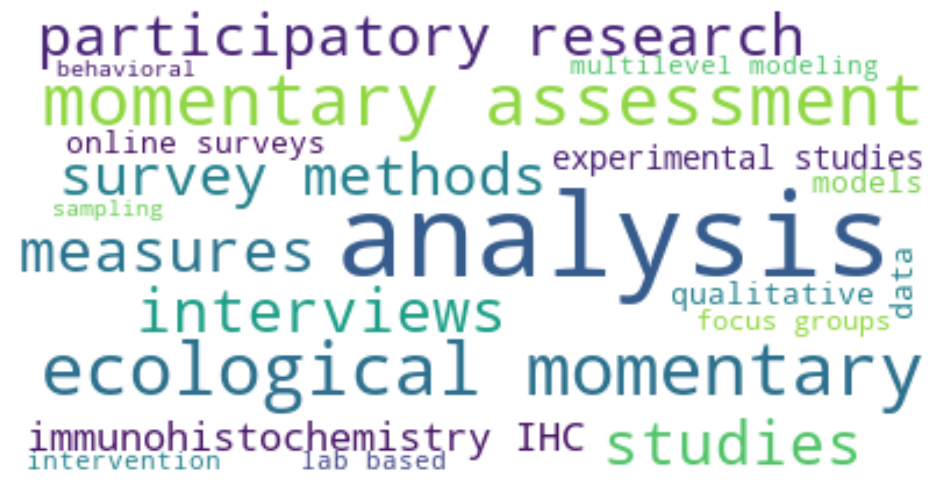

In [22]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(rm_keywords_text)
plt.figure()

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.gcf().set_size_inches(12, 10)
plt.axis("off")
plt.show()